In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

all_data = pd.read_csv('./titanic/train.csv')
print('All = ', all_data.shape)
train_data = all_data.sample(frac=0.75, random_state=0)
print('Train = ', train_data.shape)
test_data = all_data.drop(train_data.index)
print('Test = ', test_data.shape)

train_data.head(10)

All =  (891, 12)
Train =  (668, 12)
Test =  (223, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C


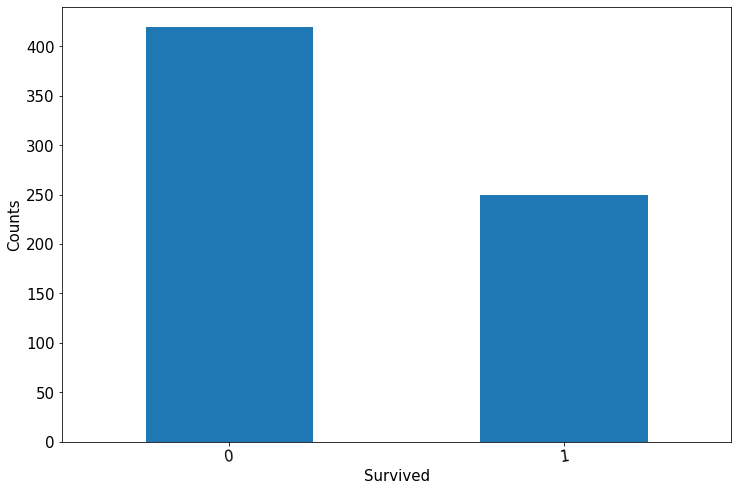

In [3]:
train_survived_plot = train_data['Survived'].value_counts().plot(kind='bar', figsize=(12,8), fontsize=15, rot=8)
train_survived_plot.set_ylabel('Counts', fontsize=15)
train_survived_plot.set_xlabel('Survived', fontsize=15)
plt.show()

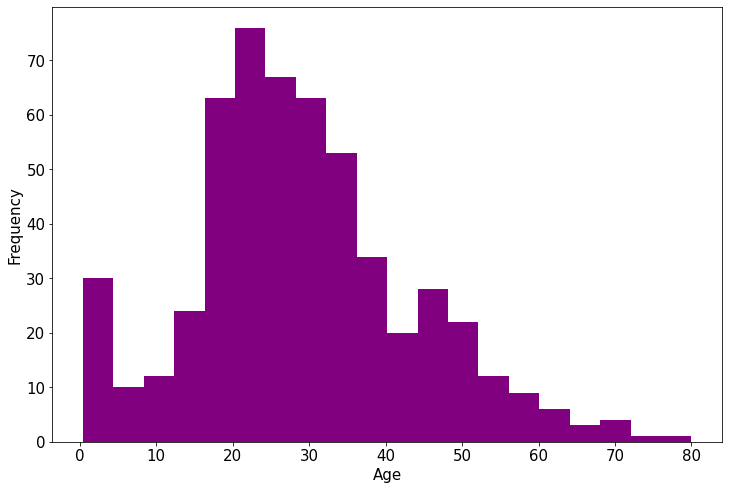

In [4]:
train_age_plt = train_data['Age'].plot(kind='hist', bins=20, color='purple', figsize=(12, 8), fontsize=15)
train_age_plt.set_ylabel('Frequency', fontsize=15)
train_age_plt.set_xlabel('Age', fontsize=15)
plt.show()

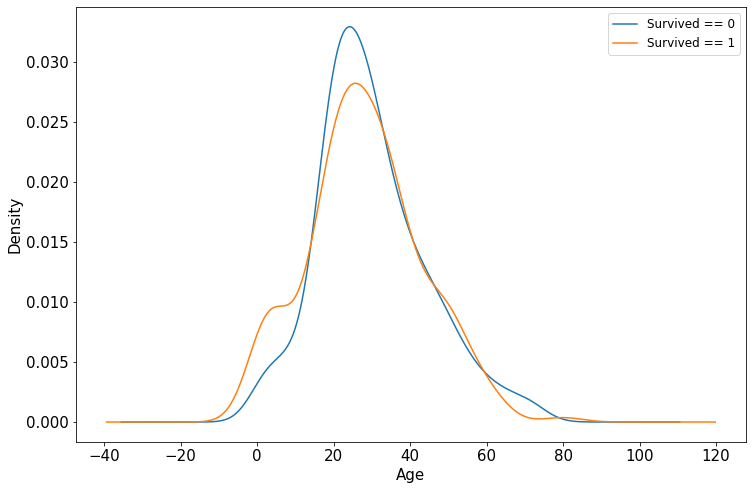

In [5]:
ax = train_data.query('Survived == 0')['Age'].plot(kind='density', figsize=(12, 8), fontsize=15)
train_data.query('Survived == 1')['Age'].plot(kind='density', figsize=(12, 8), fontsize=15)
ax.legend(['Survived == 0', 'Survived == 1'], fontsize=12)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

In [6]:
def preprocessing(dfdata):
    dfresult = pd.DataFrame()
    
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]
    dfresult = pd.concat([dfresult, dfPclass], axis = 1)

    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult, dfSex], axis = 1)

    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    dfresult['Cabin_null'] = pd.isna(dfdata['Cabin']).astype('int32')

    dfEmbarked = pd.get_dummies(dfdata['Embarked'], dummy_na = True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult, dfEmbarked], axis = 1)

    return dfresult

x_train = preprocessing(train_data)
y_train = train_data['Survived'].values
x_test = preprocessing(test_data)
y_test = test_data['Survived'].values

print('x_train.shape = ', x_train.shape)
print('x_test.shape = ', x_test.shape)
x_train.query('Embarked_nan == 1').head(10)

x_train.shape =  (668, 15)
x_test.shape =  (223, 15)


,Pclass_1,Pclass_2,Pclass_3,female,male,Age,Age_null,SibSp,Parch,Fare,Cabin_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
61,1,0,0,1,0,38.0,0,0,0,80.0,0,0,0,0,1


In [7]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(15,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.2)

Train on 534 samples, validate on 134 samples
Epoch 1/30
534/534 [==============================] - 1s 3ms/sample - loss: 1.9372 - AUC: 0.3867 - val_loss: 2.4760 - val_AUC: 0.3967
Epoch 2/30
534/534 [==============================] - 0s 159us/sample - loss: 1.5303 - AUC: 0.4122 - val_loss: 1.8569 - val_AUC: 0.4277
Epoch 3/30
534/534 [==============================] - 0s 110us/sample - loss: 1.1870 - AUC: 0.4368 - val_loss: 1.3536 - val_AUC: 0.5123
Epoch 4/30
534/534 [==============================] - 0s 127us/sample - loss: 0.9269 - AUC: 0.5493 - val_loss: 0.9553 - val_AUC: 0.5703
Epoch 5/30
534/534 [==============================] - 0s 252us/sample - loss: 0.7422 - AUC: 0.6438 - val_loss: 0.7064 - val_AUC: 0.6624
Epoch 6/30
534/534 [==============================] - 0s 126us/sample - loss: 0.6352 - AUC: 0.6998 - val_loss: 0.6609 - val_AUC: 0.6810
Epoch 7/30
534/534 [==============================] - 0s 135us/sample - loss: 0.6012 - AUC: 0.7091 - val_loss: 0.6241 - val_AUC: 0.6919
Epoc

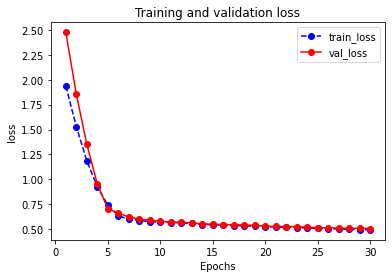

In [10]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_' + metric, 'val_' + metric])
    plt.show()

plot_metric(history, 'loss')

In [11]:
model.evaluate(x=x_test, y=y_test)

223/223 [==============================] - 0s 198us/sample - loss: 0.5144 - AUC: 0.8572


[0.5143876836171599, 0.85715467]

In [26]:
raw_data = pd.read_csv('./titanic/test.csv')
f_test = preprocessing(raw_data)
f_result = model.predict_classes(f_test)

d_result = pd.DataFrame()
d_result['PassengerId'] = raw_data['PassengerId']
d_result['Survived'] = f_result

d_result.to_csv('./titanic/result.csv', index=False)
print('Result Shape = ', d_result.shape)

Result Shape =  (418, 2)
